In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import eotdl

eotdl.__version__

'2024.10.07'

In this notebook we generate the dataset for the use case

1. Generate list of Satellogic images to be used (containing bb and acquisition time)
2. Explore available S1/S2 images with different criteria
	- bounding box overlap
	- acquisition time overlap
3. Download matching S1/S2 at given resolution
4. Generate metadata and ingest to EOTDL 

In [3]:
import geopandas as gpd

gdf = gpd.read_parquet('satellogic-earthview-items.parquet')

gdf.head()

,json_path,zone,region,date,geometry
0,data/json/zone=04N/region=603411_2346301/date=...,04N,603411_2346301,2022-09-15,"POLYGON ((-157.99991 21.21181, -157.99988 21.2..."
1,data/json/zone=04N/region=603411_2346685/date=...,04N,603411_2346685,2022-09-15,"POLYGON ((-157.99988 21.21528, -157.99986 21.2..."
2,data/json/zone=04N/region=603411_2347069/date=...,04N,603411_2347069,2022-09-15,"POLYGON ((-157.99986 21.21875, -157.99984 21.2..."
3,data/json/zone=04N/region=603411_2347453/date=...,04N,603411_2347453,2022-09-15,"POLYGON ((-157.99984 21.22221, -157.99981 21.2..."
4,data/json/zone=04N/region=603411_2347837/date=...,04N,603411_2347837,2022-09-15,"POLYGON ((-157.99981 21.22568, -157.99979 21.2..."


In [287]:
sample = gdf.sample(30, random_state=42)
sample

,json_path,zone,region,date,geometry
4884232,data/json/zone=40N/region=357629_2284200/date=...,40N,357629_2284200,2022-11-29,"POLYGON ((55.63707 20.64826, 55.63704 20.65173..."
4765404,data/json/zone=40N/region=326763_2784655/date=...,40N,326763_2784655,2022-09-10,"POLYGON ((55.28493 25.16457, 55.28488 25.16804..."
1697143,data/json/zone=20S/region=540228_5913815/date=...,20S,540228_5913815,2022-11-03,"POLYGON ((-62.54402 -36.92427, -62.54404 -36.9..."
5606543,data/json/zone=44N/region=434560_3694157/date=...,44N,434560_3694157,2022-12-14,"POLYGON ((80.30057 33.38126, 80.30054 33.38472..."
6888021,data/json/zone=56S/region=333094_6250849/date=...,56S,333094_6250849,2022-10-29,"POLYGON ((151.19958 -33.87302, 151.19966 -33.8..."
4218300,data/json/zone=39N/region=536370_3955088/date=...,39N,536370_3955088,2022-11-15,"POLYGON ((51.40645 35.73564, 51.40646 35.73910..."
763014,data/json/zone=13N/region=590951_5101924/date=...,13N,590951_5101924,2022-08-09,"POLYGON ((-103.81915 46.06133, -103.81907 46.0..."
1702723,data/json/zone=20S/region=575047_7159424/date=...,20S,575047_7159424,2022-09-03,"POLYGON ((-62.24829 -25.68451, -62.24831 -25.6..."
2648887,data/json/zone=31N/region=319128_4592758/date=...,31N,319128_4592758,2022-08-01,"POLYGON ((0.83881 41.46267, 0.83869 41.46612, ..."
833734,data/json/zone=13N/region=599783_5128420/date=...,13N,599783_5128420,2022-09-13,"POLYGON ((-103.69938 46.29850, -103.69929 46.3..."


Download the images

In [288]:
!rm -rf data/tifs/satellogic
!mkdir -p data/tifs/satellogic

In [289]:
import json

images = []
for _, item in sample.iterrows():
	json_path = item.json_path
	with open(json_path, 'r') as f:
		metadata = json.load(f)
	asset = metadata['assets']['analytic']['href']
	asset = asset.replace('https://satellogic-earthview.s3.us-west-2.amazonaws.com/', 's3://satellogic-earthview/')
	!s5cmd -endpoint-url https://s3.us-west-2.amazonaws.com --no-sign-request cp {asset} data/tifs/satellogic > /dev/null 2>&1
	images.append(asset.split('/')[-1])

len(images)


30

In [290]:
images = sample.json_path.str.split('/').str[-1].tolist()
images = [i.replace('_metadata.json', '_TOA.tif') for i in images]
for image in images:
	assert image in os.listdir('data/tifs/satellogic')

len(images)

30

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.337..1.2086666666666666].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.194..1.0996666666666666].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.8953333333333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15866666666666668..1.1393333333333333].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.15866666666666668..1.1393333333333333].


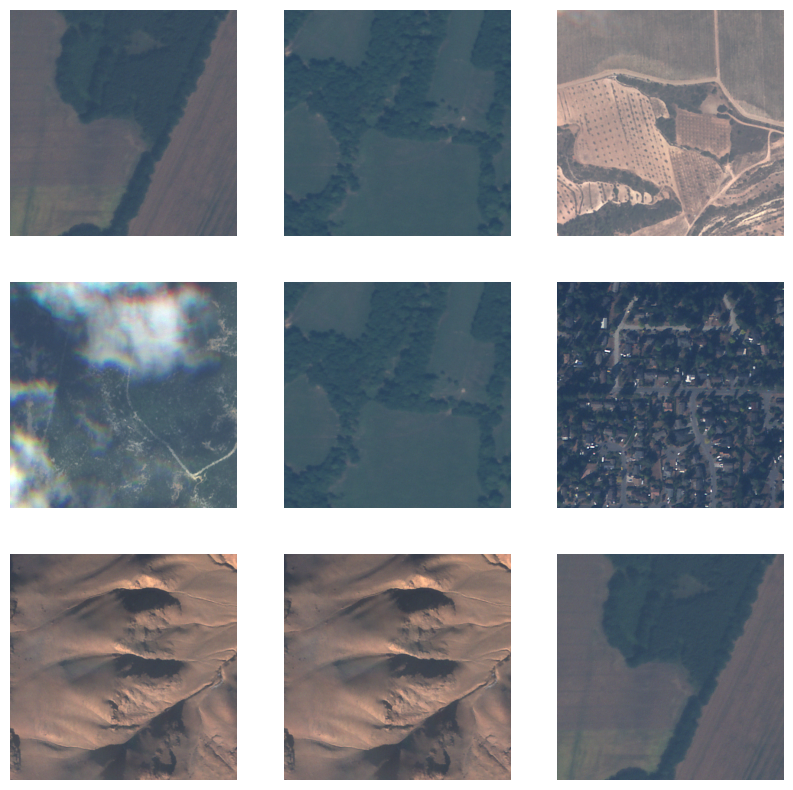

In [291]:
# plot random images

import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
n = 3
fig, axs = plt.subplots(n, n, figsize=(10, 10))
for ax in axs.flatten():
	x = rio.open(f'data/tifs/satellogic/{np.random.choice(images)}').read()
	ax.imshow(x[:3,...].transpose(1, 2, 0) / 3000)
	ax.axis('off')
plt.show()


In [292]:
x.shape, x.dtype, x.min(), x.max()

((4, 384, 384), dtype('uint16'), np.uint16(472), np.uint16(4569))

In [293]:
from eotdl.access import SUPPORTED_SENSORS

SUPPORTED_SENSORS

('sentinel-1-grd', 'sentinel-2-l1c', 'sentinel-2-l2a', 'dem')

In [294]:
from eotdl.access import search_sentinel_imagery
from datetime import datetime, timedelta

matches = []
time_buffer = 5 # days
for item in sample.itertuples():
	date = item.date
	dates = [(date - timedelta(days=time_buffer/2)).strftime('%Y-%m-%d'), (date + timedelta(days=time_buffer/2)).strftime('%Y-%m-%d')]
	# print(date, dates)
	bb = item.geometry.bounds
	bb = [bb[0], bb[1], bb[2], bb[3]]
	r = search_sentinel_imagery(dates, bb, 'sentinel-2-l2a')
	matches.append(list(r)[0] if len(list(r)) > 0 else None) # keep first match
	# matches.append(list(r))

matches

[{'id': 'S2B_MSIL2A_20221129T065229_N0400_R020_T40QCH_20221129T082243',
  'properties': {'datetime': '2022-11-29T07:03:51Z', 'eo:cloud_cover': 0.0}},
 {'id': 'S2B_MSIL2A_20220910T064629_N0400_R020_T40RCN_20220910T092641',
  'properties': {'datetime': '2022-09-10T07:02:43Z', 'eo:cloud_cover': 0.0}},
 {'id': 'S2B_MSIL2A_20221102T135659_N0400_R067_T20HNE_20221102T193657',
  'properties': {'datetime': '2022-11-02T14:12:49Z', 'eo:cloud_cover': 0.0}},
 {'id': 'S2B_MSIL2A_20221212T052219_N0509_R062_T44SMB_20221212T075933',
  'properties': {'datetime': '2022-12-12T05:29:42Z', 'eo:cloud_cover': 0.2}},
 {'id': 'S2B_MSIL2A_20221031T000219_N0400_R030_T56HLH_20221031T013205',
  'properties': {'datetime': '2022-10-31T00:06:06Z', 'eo:cloud_cover': 88.12}},
 {'id': 'S2A_MSIL2A_20221113T072141_N0400_R006_T39SWV_20221113T103859',
  'properties': {'datetime': '2022-11-13T07:29:50Z', 'eo:cloud_cover': 0.15}},
 {'id': 'S2B_MSIL2A_20220809T174909_N0400_R141_T13TEM_20220809T220150',
  'properties': {'datetim

In [295]:
matches[0]

{'id': 'S2B_MSIL2A_20221129T065229_N0400_R020_T40QCH_20221129T082243',
 'properties': {'datetime': '2022-11-29T07:03:51Z', 'eo:cloud_cover': 0.0}}

In [296]:
# !rm -rf data/tifs/sentinel2

In [297]:
from eotdl.tools import bbox_from_centroid
from eotdl.access import download_sentinel_imagery

WIDTH = 38
HEIGHT = 38

s2_paths = []
for item, match in zip(sample.itertuples(), matches):
	if not match:
		s2_paths.append(None)
		continue
	centroid = item.geometry.centroid
	# custom_bbox = bbox_from_centroid(x=centroid.x, y=centroid.y, pixel_size=10, width=WIDTH, height=HEIGHT)
	custom_bbox = bbox_from_centroid(x=centroid.y, y=centroid.x, pixel_size=10, width=WIDTH, height=HEIGHT)
	date = match['properties']['datetime']
	name = f"s2_{item.region}_{item.zone}"
	# print(item.geometry.bounds, custom_bbox)
	download_sentinel_imagery("data/tifs/sentinel2", date, custom_bbox, "sentinel-2-l2a", name=name)
	s2_paths.append(f"data/tifs/sentinel2/{name}.tif")

s2_paths


['data/tifs/sentinel2/s2_357629_2284200_40N.tif',
 'data/tifs/sentinel2/s2_326763_2784655_40N.tif',
 'data/tifs/sentinel2/s2_540228_5913815_20S.tif',
 'data/tifs/sentinel2/s2_434560_3694157_44N.tif',
 'data/tifs/sentinel2/s2_333094_6250849_56S.tif',
 'data/tifs/sentinel2/s2_536370_3955088_39N.tif',
 'data/tifs/sentinel2/s2_590951_5101924_13N.tif',
 'data/tifs/sentinel2/s2_575047_7159424_20S.tif',
 'data/tifs/sentinel2/s2_319128_4592758_31N.tif',
 'data/tifs/sentinel2/s2_599783_5128420_13N.tif',
 'data/tifs/sentinel2/s2_469260_5381005_10N.tif',
 'data/tifs/sentinel2/s2_304922_3818771_43N.tif',
 'data/tifs/sentinel2/s2_407892_2858234_14N.tif',
 'data/tifs/sentinel2/s2_324459_2776207_40N.tif',
 'data/tifs/sentinel2/s2_396405_3739623_11N.tif',
 'data/tifs/sentinel2/s2_358987_6609029_51S.tif',
 'data/tifs/sentinel2/s2_518978_5945256_33N.tif',
 'data/tifs/sentinel2/s2_451615_4630841_16N.tif',
 'data/tifs/sentinel2/s2_376571_3785042_11N.tif',
 'data/tifs/sentinel2/s2_506147_1333014_33N.tif',


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


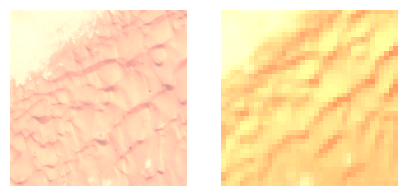

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


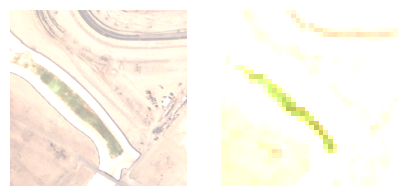

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


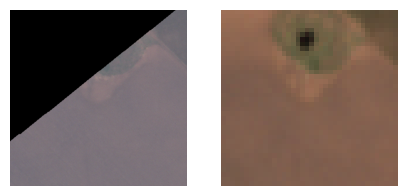

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


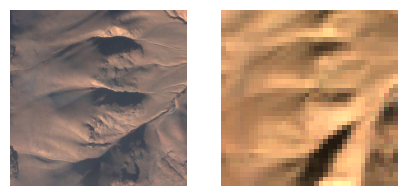

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


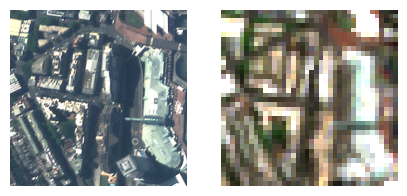

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


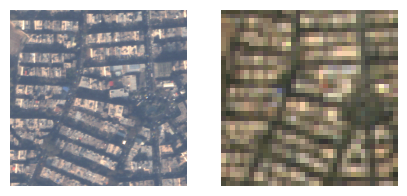

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


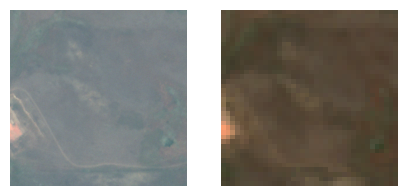

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


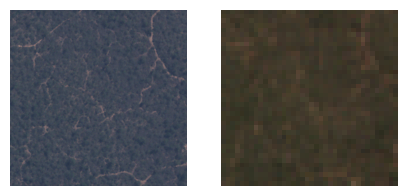

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


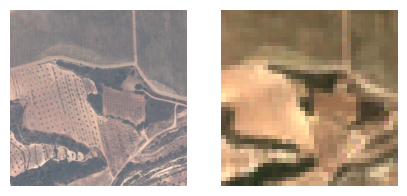

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


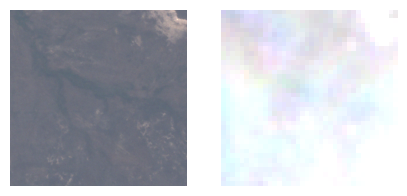

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


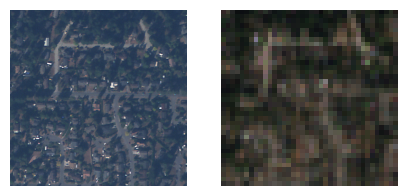

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


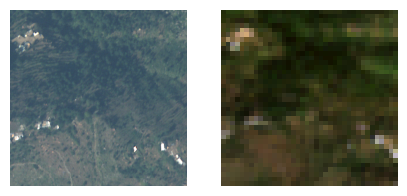

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


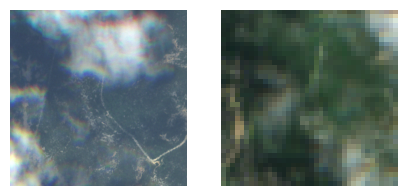

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


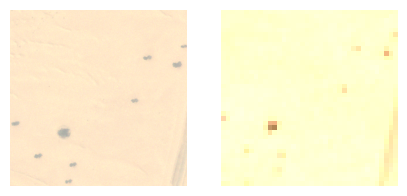

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


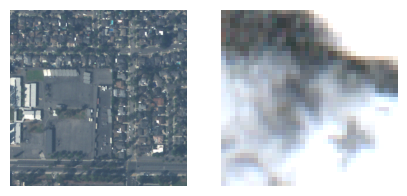

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


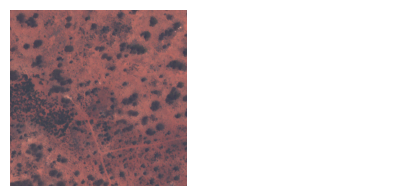

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


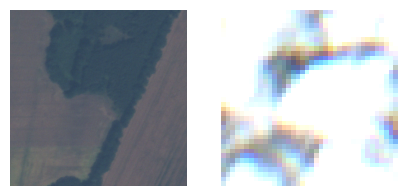

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


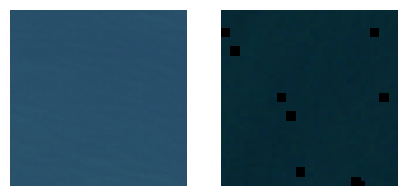

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


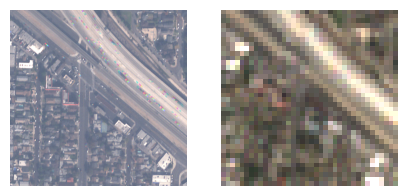

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


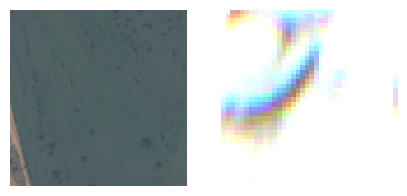

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


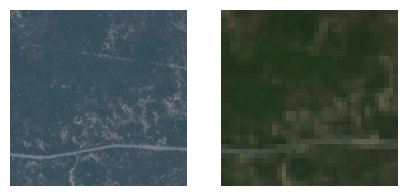

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


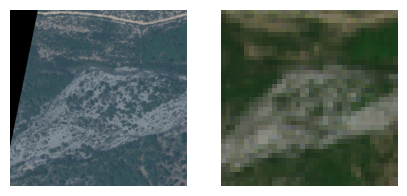

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


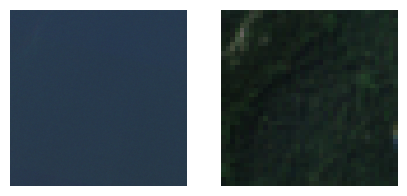

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


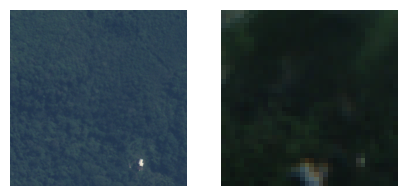

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


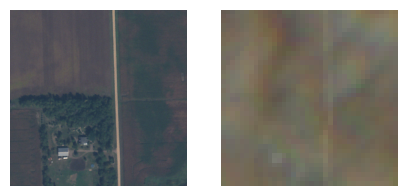

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


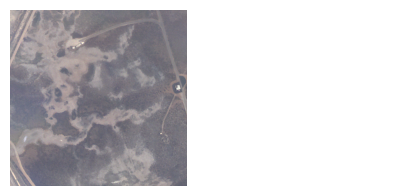

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


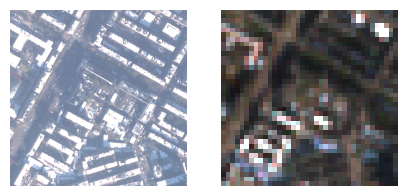

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


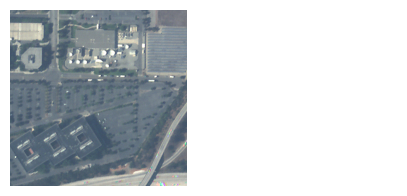

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


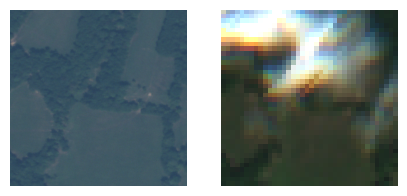

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


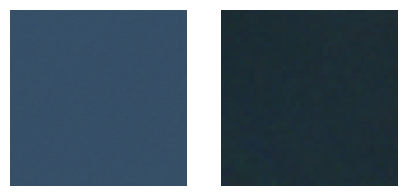

In [298]:
for sat_image, s2_image in zip(images, s2_paths):
	fig, axs = plt.subplots(1, 2, figsize=(5, 3))
	axs[0].imshow((rio.open('data/tifs/satellogic/' + sat_image).read()[:3,...].transpose(1, 2, 0) / 3000).clip(0, 1))
	axs[0].axis('off')
	axs[1].imshow((rio.open(s2_image).read()[(3,2,1),...].transpose(1, 2, 0) / 3000).clip(0, 1))
	axs[1].axis('off')
	plt.show()

